Step 1 : 1-D Linear Convection
----
***

The 1-D Linear Convection equation is the simplest, most basic model that can be used to learn something about CFD. It is surprising that this little equation can teach us so much! Here it is:

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

With given initial conditions (understood as a *wave*), the equation represents the propagation of that initial *wave* with speed $c$, without change of shape. Let the initial condition be $u(x,0)=u_0(x)$. Then the exact solution of the equation is $u(x,t)=u_0(x-ct)$.

We discretize this equation in both space and time, using the Forward Difference scheme for the time derivative and the Backward Difference scheme for the space derivative. Consider discretizing the spatial coordinate $x$ into points that we index from $i=0$ to $N$, and stepping in discrete time intervals of size $\Delta t$.

From the definition of a derivative (and simply removing the limit), we know that:

$$\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}$$

Our discrete equation, then, is:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 $$

Where $n$ and $n+1$ are two consecutive steps in time, while $i-1$ and $i$ are two neighboring points of the discretized $x$ coordinate. If there are given initial conditions, then the only unknown in this discretization is $u_i^{n+1}$.  We can solve for our unknown to get an equation that allows us to advance in time, as follows:

$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

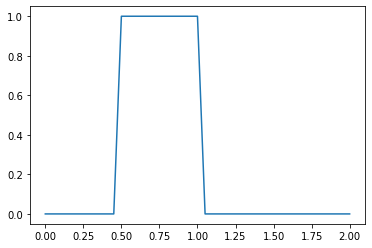

In [94]:
# space discritization
nx = 41 # The number of nodes (discritization of the space)
dx = 2 / (nx-1)
#time discritization
nt = 20    #nt is the number of timesteps we want to calculate
dt = 0.25  #dt is the amount of time each timestep covers (delta t)
c = 1     # The wave's speed
# let's concider the wave u = 0 in all the points except in between 0.5 and 1
u = np.zeros(nx)      
u[int(.5 / dx):int(1 / dx + 1)] = 1
plt.plot(np.linspace(0, 2, nx), u);

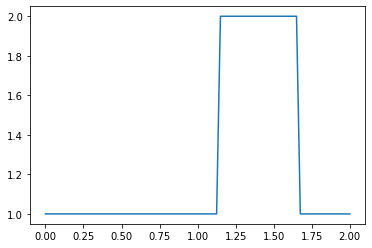

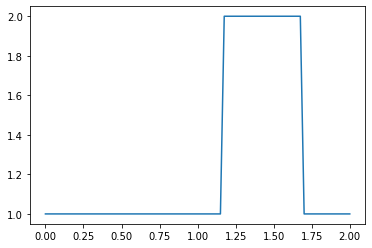

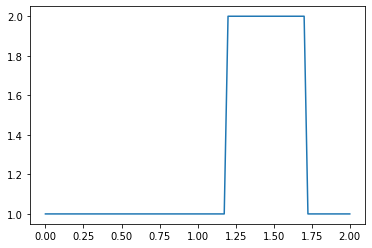

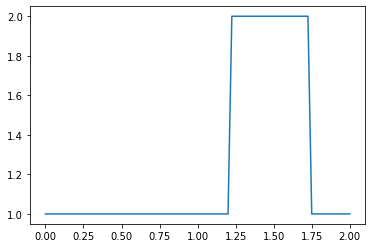

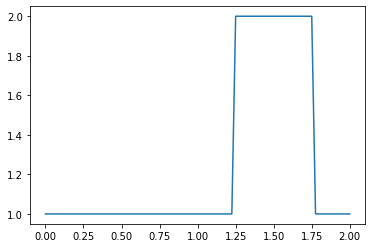

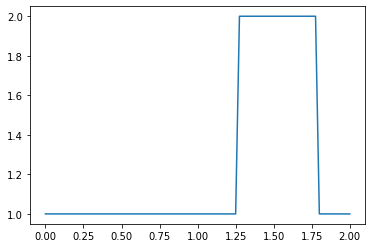

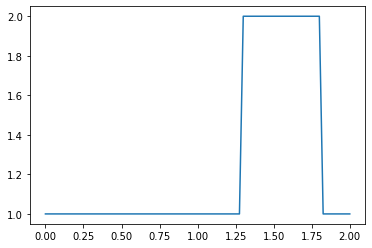

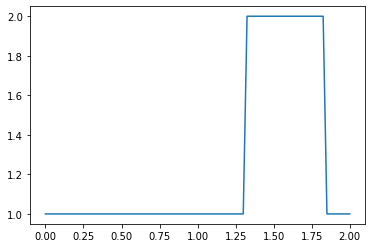

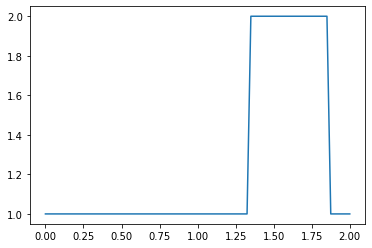

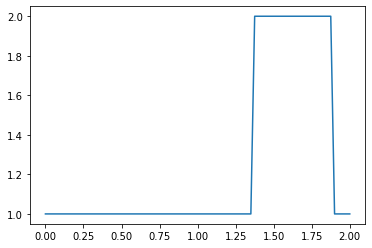

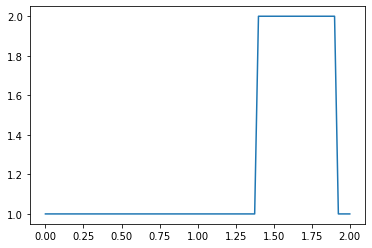

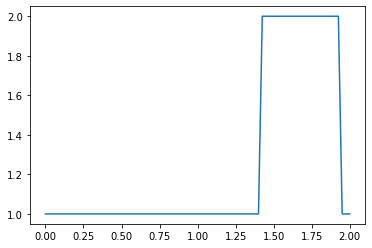

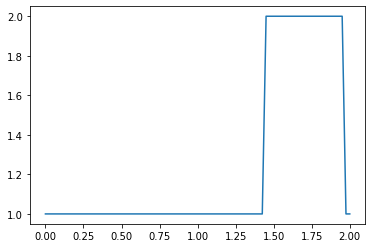

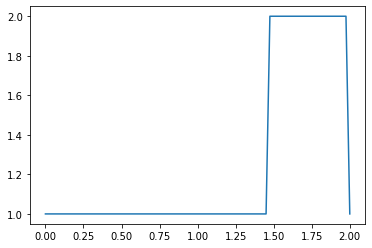

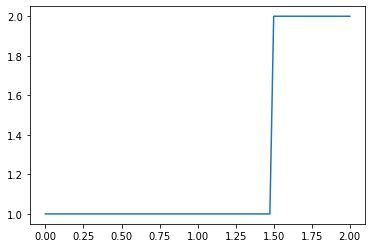

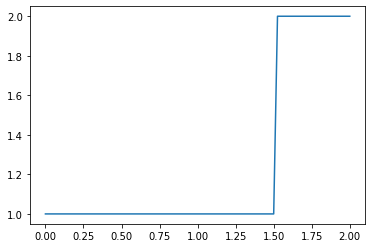

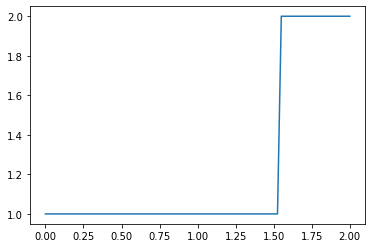

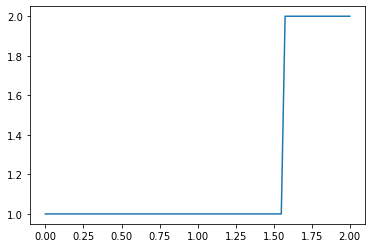

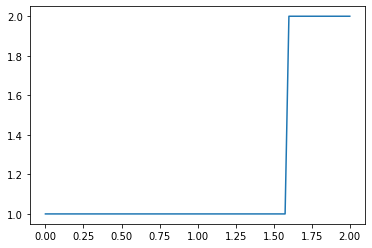

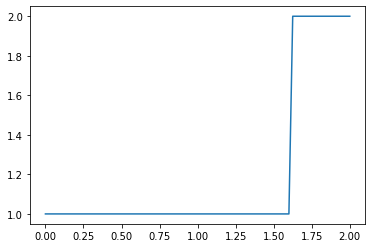

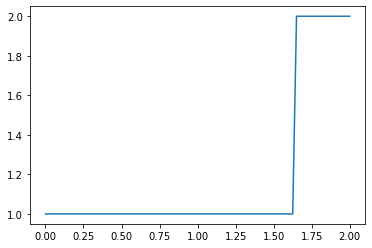

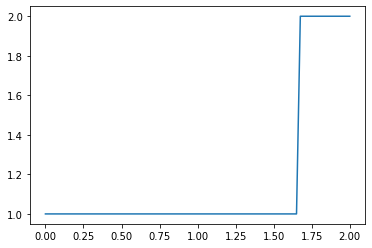

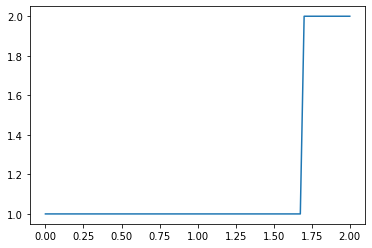

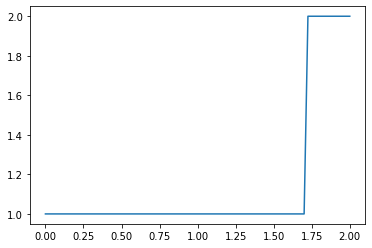

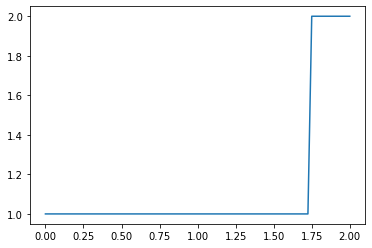

In [103]:
#plt.plot(np.linspace(0, 2, nx), u);
un = numpy.zeros(nx) #initialize a temporary array
for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    plt.plot(np.linspace(0, 2, nx), u);
    plt.show()